<a href="https://colab.research.google.com/github/SANTHOSH-SACHIN/Sample-PGMS/blob/main/COLAB_CAMERA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<IPython.core.display.Javascript object>

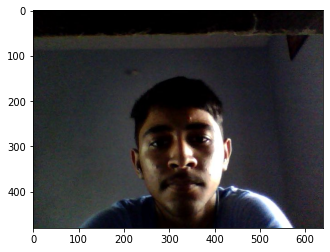

In [ ]:
import tempfile
import cv2

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();
      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      // Waiting any shorter than this seems to make the image really red
      // You may want to remove this depending on your webcam
      await new Promise(r => setTimeout(r, 175))
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])

  # Create temporary file for holding image data
  img_file = tempfile.NamedTemporaryFile()
  img_file.write(binary)

  # Read temp. file and convert it to a Numpy array
  img = cv2.imread(img_file.name)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # Close file
  img_file.close()

  return img
import matplotlib.pyplot as plt

img = take_photo()

plt.imshow(img)
plt.show()